# Netflix Data Analysis

Exploratory analysis with Pandas.

## 📚 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 📖 Data reading

In [41]:
df = pd.read_csv("../data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🏁 General information

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [28]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [29]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

## 🧹 Cleaning and data transformations

In [45]:
# Fill absent values with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Remove absent values
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['duration'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

In [46]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [47]:
df['release_year'] = df['release_year'].apply(lambda x: int(x))

In [48]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [51]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


In [52]:
# Separate the quantity and type of duration (min or Seasons)
df[['duration_int', 'duration_type']] = df['duration'].str.extract('(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

In [54]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1,Season


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8790 non-null   object        
 1   type           8790 non-null   object        
 2   title          8790 non-null   object        
 3   director       8790 non-null   object        
 4   cast           8790 non-null   object        
 5   country        8790 non-null   object        
 6   date_added     8790 non-null   datetime64[ns]
 7   release_year   8790 non-null   int64         
 8   rating         8790 non-null   object        
 9   duration       8790 non-null   object        
 10  listed_in      8790 non-null   object        
 11  description    8790 non-null   object        
 12  year_added     8790 non-null   int64         
 13  month_added    8790 non-null   int64         
 14  duration_int   8790 non-null   int64         
 15  duration_type  8790 n

## 🔎 Data visualization and insights

### 🎭 Types of content

In [70]:
df['type'].value_counts()/len(df)

Movie      0.696928
TV Show    0.303072
Name: type, dtype: float64

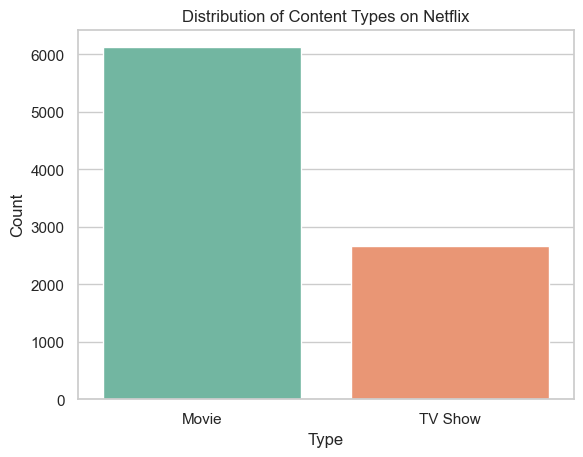

In [58]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The majority of titles are composed of films, representing approximately 70% of the catalog, while series account for the remaining 30%. This may indicate that the platform's primary focus is long-duration content.

### 🌍 Countries with more titles

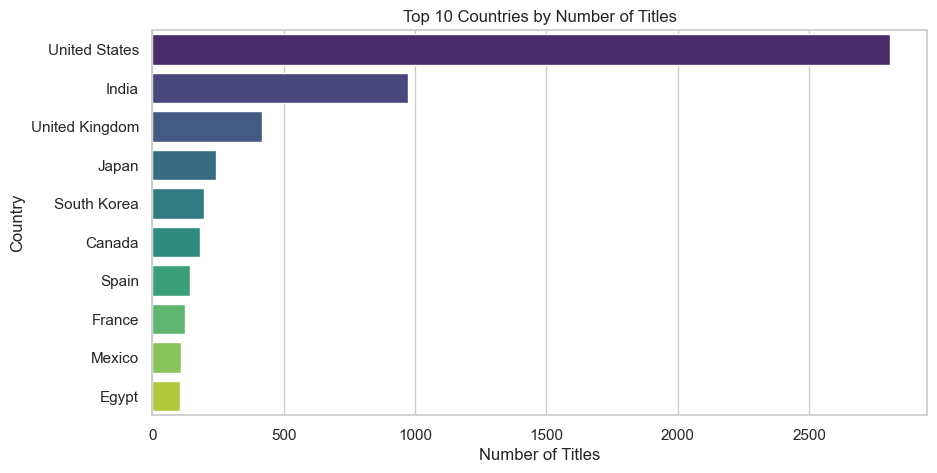

In [69]:
top_countries = df['country'].value_counts().drop('Unknown').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

The United States leads the number of titles by a significant margin, followed by India and the UK. This reflects the origin and the primary audience of the platform.

### 📆 Number of releases per year

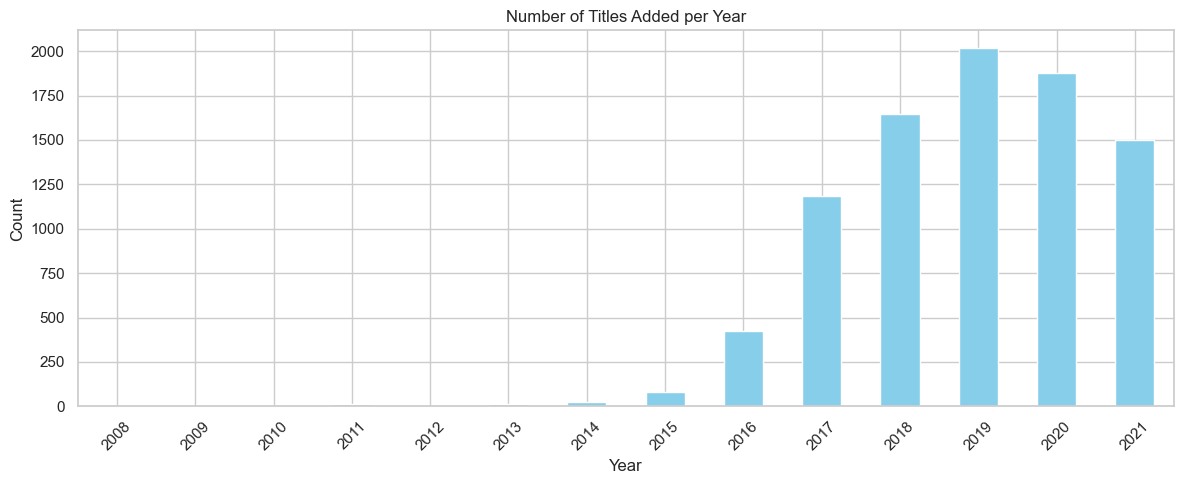

In [60]:
titles_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,5))
titles_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is noticeable, constant growth in the number of titles until 2019, followed by a drop in 2020, possibly due to changes in the industry caused by global events (such as the COVID-19 pandemic) or the Netflix acquisition process.

### 🎬 Analysis by genre

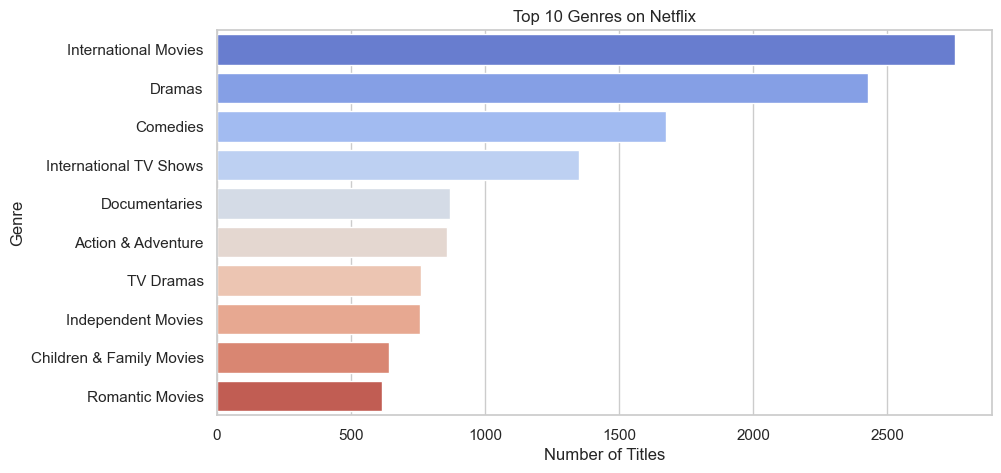

In [67]:
# Explode os gêneros separados por vírgula
genres = df['listed_in'].apply(lambda x: x.split(', ')).explode()
genre_counts = genres.value_counts()
genre_counts

# Top 10 gêneros
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


Genres such as International movies, drama, comedy, and documentaries are predominant, indicating subscribers' interest in format and content diversity.

### 👤 Most frequent directors

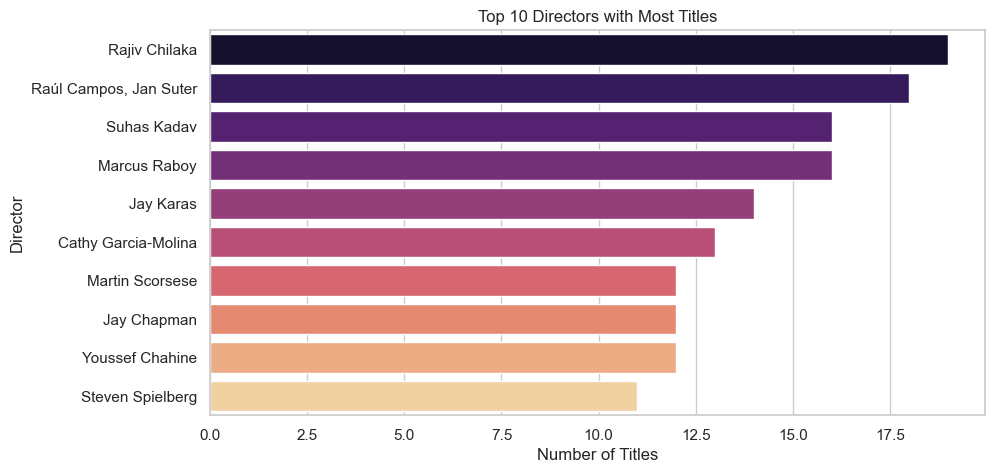

In [68]:
top_directors = df['director'].value_counts().drop('Unknown', errors='ignore').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

Some directors concentrate a high number of titles on the platform, which may indicate strategic partnerships or commercial success.

## 📌 Key Insights

- **Movies** dominated Netflix's catalog in mid-2021, but TV shows also represent a significant portion.

- The **United States, India, and the United Kingdom** lead as the countries with the most available titles.

- The number of titles added increased steadily until **2019**, with a slight decline in the following years.

- **International movies, Drama, Comedy, and Documentaries** are the most common genres.

- Some directors, such as **Rajiv Chilaka** , appear frequently, suggesting recurring partnerships with the platform.

## 🧠 Reflections and Learnings

As part of this exploratory data analysis project using the Netflix catalog dataset, here are some personal reflections:

### ✅ What I Reviewed
- Manipulating and cleaning data using **Pandas** (handling missing values, parsing dates, string operations).
- Data visualization with **Seaborn** and **Matplotlib**.
- Extracting meaningful insights from categorical and temporal data.

### ⚠️ Challenges I Faced
- Interpreting missing or ambiguous values, especially for fields like `duration`, which mixes units.
- Ensuring consistent formats in fields like `listed_in`, `country`, and `director` that contain multiple values.
- Choosing the best visualizations to convey patterns clearly.

### 🔁 What I Would Do Differently
- Refactor the code to use reusable **functions** and make the notebook more modular.
- Incorporate more advanced visualizations (e.g., **heatmaps**, **word clouds**, or **time series trends**).
- Expand the analysis to explore **user behavior** or **regional availability**, if more data were available.

This project helped reinforce my knowledge in EDA and data storytelling. It was also a great exercise in documenting and communicating findings.